# Sub-optimal Solution

In [ ]:
# Import necessary libraries
import pandas as pd
import zipfile

# Unzip the file and extract the CSV
zip_file_path = '/content/drive/MyDrive/Convolve/final_test_autoencoder_scaled.csv.zip'  # Replace with the actual path to your zip file
csv_filename = 'final_test_autoencoder_scaled.csv'  # Replace with the name of the CSV inside the zip file

# Extract the CSV file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extract(csv_filename)  # Extracts the CSV to the current directory

# Load the extracted dataset
data = pd.read_csv(csv_filename)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Display the first few rows of the dataframe to understand its structure
# print("First five rows of the dataset:")
data.head()

,Unnamed: 0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC168,PC169,PC170,PC171,PC172,PC173,PC174,PC175,PC176,bad_flag
0,0,23.412883,-22.003743,-1.530785,-19.705733,-1.412440,7.397862,-2.767493,5.587613,0.040142,...,-1.501334,-1.026234,-1.011515,0.244478,-0.220987,-0.115508,0.729233,0.915038,-0.042944,0.0
1,1,3.994716,11.765458,-0.053987,3.693572,5.977910,-0.532467,-10.206482,2.112106,5.400843,...,2.784156,-1.946109,-3.059850,1.177187,-0.507863,-0.053106,1.103720,1.314651,-2.887192,0.0
2,2,-4.004826,2.823564,-2.184409,0.552139,-4.374008,-1.801958,-0.117943,0.281419,-0.460354,...,-0.152339,0.677106,-0.470794,-0.011725,-0.237254,0.027934,-0.382408,0.125093,-0.011041,0.0
3,3,15.128080,-2.157036,-1.761211,-8.757986,-6.780392,-1.337995,-1.698556,-0.776445,1.850265,...,0.184467,1.072802,0.695168,-0.854015,0.842516,-1.030614,0.792030,0.054570,0.415114,0.0
4,4,-1.130672,-3.369431,-4.653534,-1.573042,8.122243,-2.171306,3.981821,-1.713016,4.840398,...,0.838368,1.820599,0.250957,-0.946946,-1.889719,2.233030,0.897218,-2.425523,-0.704948,0.0


In [ ]:
#looking at the tail
data.tail()

,Unnamed: 0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC168,PC169,PC170,PC171,PC172,PC173,PC174,PC175,PC176,bad_flag
96801,96801,2.306309,2.069408,3.316747,0.104756,-0.604293,-3.381859,-3.838324,-2.382250,-3.878813,...,-4.007144,-1.071637,-0.259805,-0.301008,1.425560,0.608290,-2.226275,-0.956650,-0.026755,0.0
96802,96802,8.475419,-5.044774,-4.362550,-5.686396,-8.645995,1.179121,-1.792812,-0.902314,0.526779,...,-0.142057,-0.166050,0.976151,1.185111,-0.711623,-0.795366,-0.550046,0.126599,0.296970,0.0
96803,96803,3.676912,12.290881,4.201142,-5.630581,-0.268461,-5.240849,3.555018,0.727614,1.349259,...,0.236603,-0.445288,-0.749287,0.282548,1.719908,-0.553532,-1.124400,-0.654540,0.568370,0.0
96804,96804,-0.103097,4.228758,0.120170,1.444396,1.782535,-7.515005,-2.105115,-2.087586,-5.726208,...,0.306354,0.396666,-1.613517,0.275056,-0.453509,0.194741,0.462116,-0.885692,-0.646456,0.0
96805,96805,-0.480760,8.893746,5.274090,-0.070872,-3.066764,-3.055381,-0.658133,-2.189002,-3.269713,...,0.173696,-0.156626,0.148598,-0.166535,-0.108626,-0.538412,0.483166,-0.072241,-0.496827,0.0


In [ ]:
# Ensure the target variable is identified correctly
target_column = 'bad_flag'  # Assuming 'bad_flag' is the target column

# Separate features and target variable
features = data.drop(columns=[target_column])  # Drop the target column to get features
target = data[target_column]  # Select the target column

# Check the shape of features and target
print("\nShape of Features (X):", features.shape)
print("Shape of Target (y):", target.shape)

# Print basic statistics about the target variable
print("\nTarget Variable Distribution:")
print(target.value_counts(normalize=True) * 100)


Shape of Features (X): (96806, 177)
Shape of Target (y): (96806,)

Target Variable Distribution:
bad_flag
0.0    98.582732
1.0     1.417268
Name: proportion, dtype: float64


In [ ]:
data.columns

Index(['Unnamed: 0', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8',
       'PC9',
       ...
       'PC168', 'PC169', 'PC170', 'PC171', 'PC172', 'PC173', 'PC174', 'PC175',
       'PC176', 'bad_flag'],
      dtype='object', length=178)

In [ ]:
from sklearn.model_selection import train_test_split

# Drop unnecessary columns
X = data.drop(columns=['Unnamed: 0', 'bad_flag'])  # Features
y = data['bad_flag']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (67764, 176)
Test set size: (29042, 176)


In [ ]:
y_train.value_counts()

,count
bad_flag,
0.0,66804
1.0,960


In [ ]:
from imblearn.over_sampling import ADASYN

# Apply ADASYN for resampling
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The ADASYN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
#print("Target Distribution After Resampling:")
y_train_resampled.value_counts()

,count
bad_flag,
1.0,67124
0.0,66804


In [ ]:
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve
)
import matplotlib.pyplot as plt

## Decision Tree Classifier

Confusion Matrix (Decision Tree):
 [[26335  2295]
 [  291   121]]

Classification Report (Decision Tree):
               precision    recall  f1-score   support

         0.0       0.99      0.92      0.95     28630
         1.0       0.05      0.29      0.09       412

    accuracy                           0.91     29042
   macro avg       0.52      0.61      0.52     29042
weighted avg       0.98      0.91      0.94     29042


ROC-AUC Score (Decision Tree): 0.6067643248815656


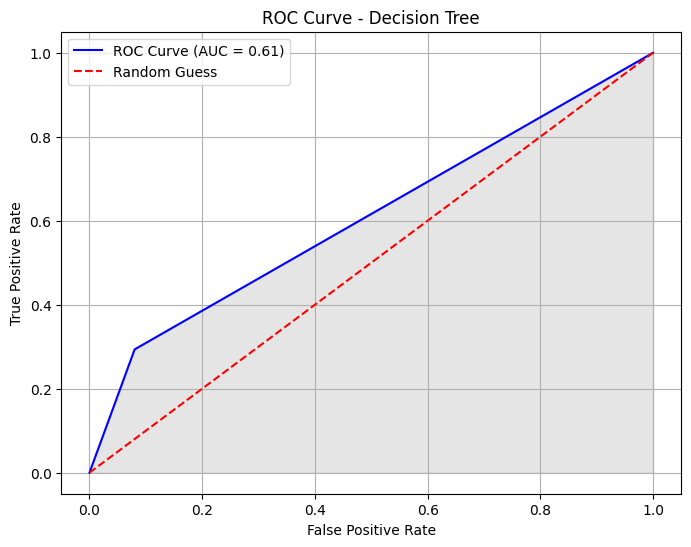

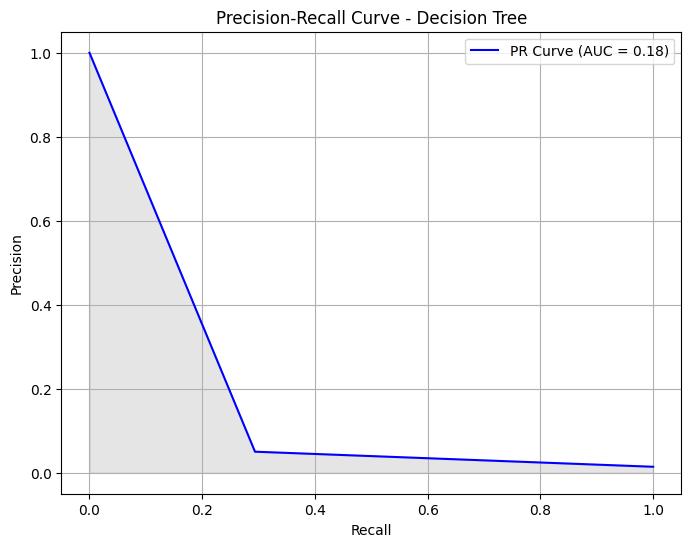

In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Initialize and train
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)

# Predictions and probabilities
y_pred = dt_model.predict(X_test)
y_prob = dt_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
print("Confusion Matrix (Decision Tree):\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report (Decision Tree):\n", classification_report(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print("\nROC-AUC Score (Decision Tree):", roc_auc)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.fill_between(fpr, tpr, alpha=0.2, color='gray')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='best')
plt.grid()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.2f})', color='blue')
plt.fill_between(recall, precision, alpha=0.2, color='gray')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Decision Tree')
plt.legend(loc='best')
plt.grid()
plt.show()

## Random Forest Classifier

Confusion Matrix (Random Forest):
 [[28370   260]
 [  328    84]]

Classification Report (Random Forest):
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     28630
         1.0       0.24      0.20      0.22       412

    accuracy                           0.98     29042
   macro avg       0.62      0.60      0.61     29042
weighted avg       0.98      0.98      0.98     29042


ROC-AUC Score (Random Forest): 0.889887423742493


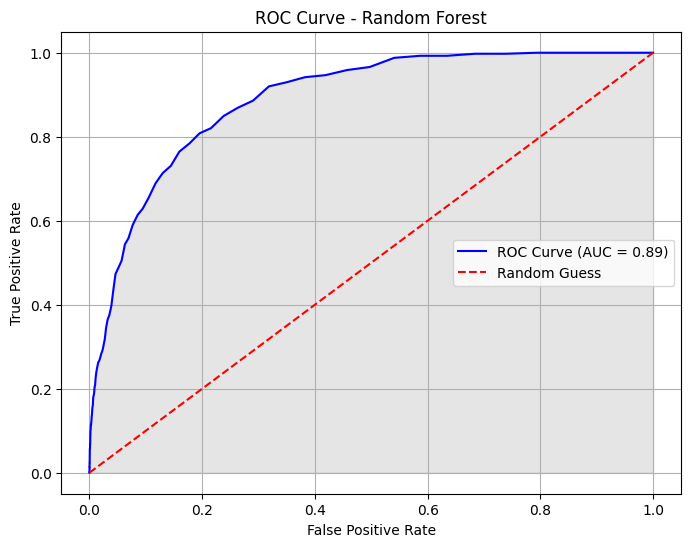

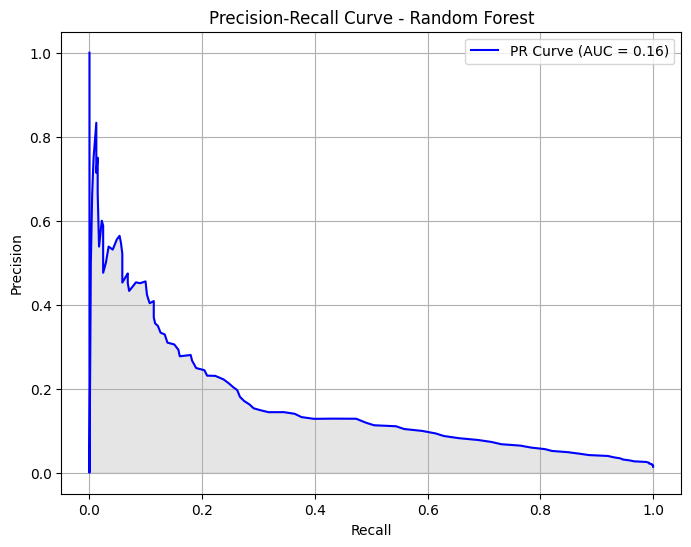

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train_resampled, y_train_resampled)

# Predictions and probabilities
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

# (Repeat the metrics and visualizations as above)

# Confusion Matrix
print("Confusion Matrix (Random Forest):\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print("\nROC-AUC Score (Random Forest):", roc_auc)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.fill_between(fpr, tpr, alpha=0.2, color='gray')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='best')
plt.grid()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.2f})', color='blue')
plt.fill_between(recall, precision, alpha=0.2, color='gray')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest')
plt.legend(loc='best')
plt.grid()
plt.show()

## Naive Bayes

Confusion Matrix (Naive Bayes):
 [[ 7754 20876]
 [  118   294]]

Classification Report (Naive Bayes):
               precision    recall  f1-score   support

         0.0       0.99      0.27      0.42     28630
         1.0       0.01      0.71      0.03       412

    accuracy                           0.28     29042
   macro avg       0.50      0.49      0.23     29042
weighted avg       0.97      0.28      0.42     29042


ROC-AUC Score (Naive Bayes): 0.4881694891976303


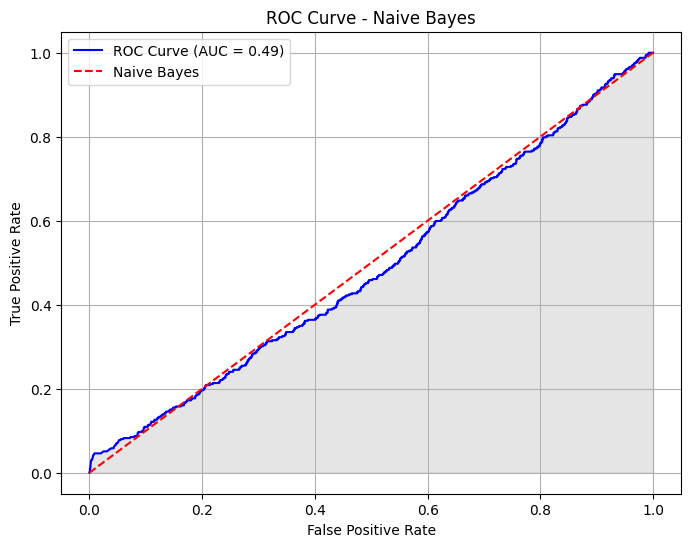

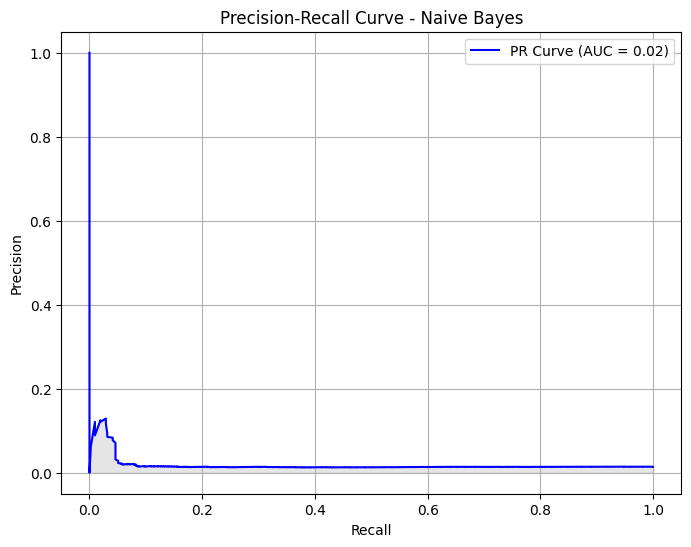

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train
nb_model = GaussianNB()
nb_model.fit(X_train_resampled, y_train_resampled)

# Predictions and probabilities
y_pred = nb_model.predict(X_test)
y_prob = nb_model.predict_proba(X_test)[:, 1]

# (Repeat the metrics and visualizations as above)

# Confusion Matrix
print("Confusion Matrix (Naive Bayes):\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report (Naive Bayes):\n", classification_report(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print("\nROC-AUC Score (Naive Bayes):", roc_auc)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.fill_between(fpr, tpr, alpha=0.2, color='gray')
plt.plot([0, 1], [0, 1], 'r--', label='Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc='best')
plt.grid()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.2f})', color='blue')
plt.fill_between(recall, precision, alpha=0.2, color='gray')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Naive Bayes')
plt.legend(loc='best')
plt.grid()
plt.show()

## XGBoost

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:15:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix (XGBoost):
 [[28192   438]
 [  274   138]]

Classification Report (XGBoost):
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.99     28630
         1.0       0.24      0.33      0.28       412

    accuracy                           0.98     29042
   macro avg       0.61      0.66      0.63     29042
weighted avg       0.98      0.98      0.98     29042


ROC-AUC Score (XGBoost): 0.889486510178406


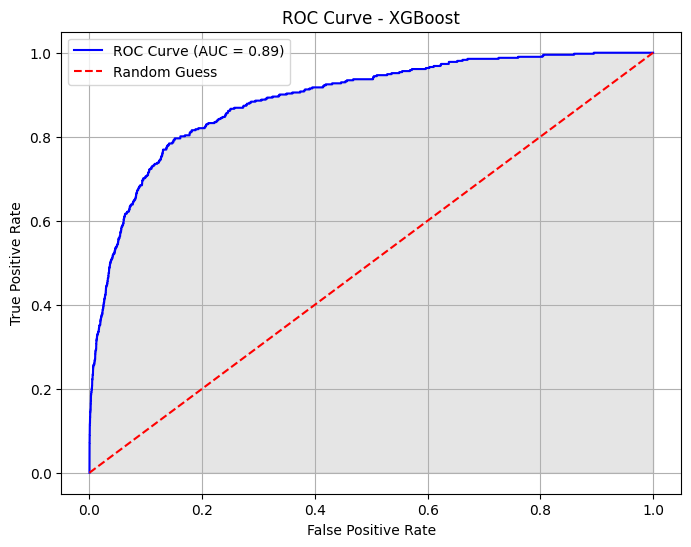

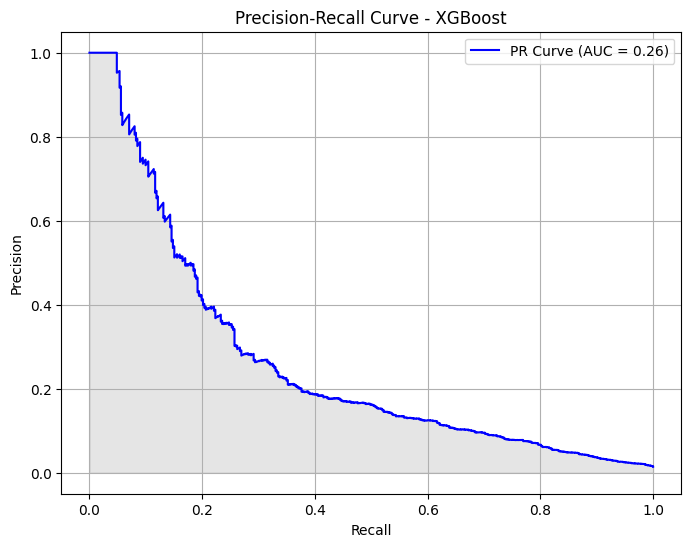

In [ ]:
from xgboost import XGBClassifier

# Initialize and train
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_resampled, y_train_resampled)

# Predictions and probabilities
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

# (Repeat the metrics and visualizations as above)

# Confusion Matrix
print("Confusion Matrix (XGBoost):\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report (XGBoost):\n", classification_report(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print("\nROC-AUC Score (XGBoost):", roc_auc)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.fill_between(fpr, tpr, alpha=0.2, color='gray')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc='best')
plt.grid()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.2f})', color='blue')
plt.fill_between(recall, precision, alpha=0.2, color='gray')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - XGBoost')
plt.legend(loc='best')
plt.grid()
plt.show()

## CatBoost

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.6 MB/s eta 0:00:00


Confusion Matrix (Catboost):
 [[28284   346]
 [  264   148]]

Classification Report (Catboost):
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     28630
         1.0       0.30      0.36      0.33       412

    accuracy                           0.98     29042
   macro avg       0.65      0.67      0.66     29042
weighted avg       0.98      0.98      0.98     29042


ROC-AUC Score (Catboost): 0.9126544225115212


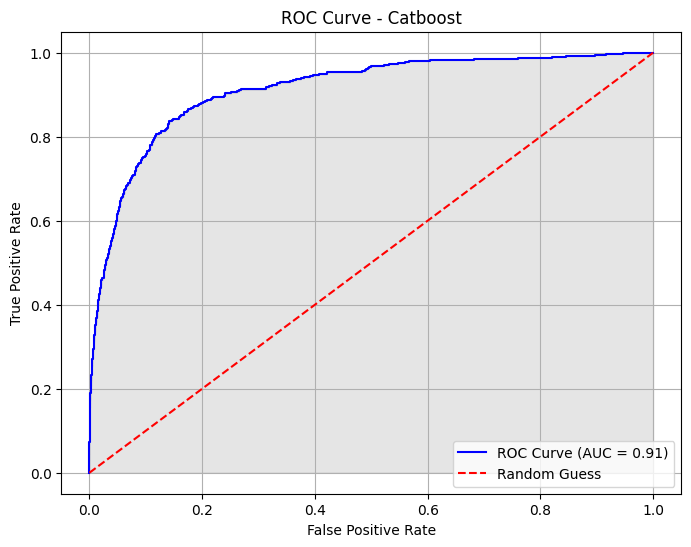

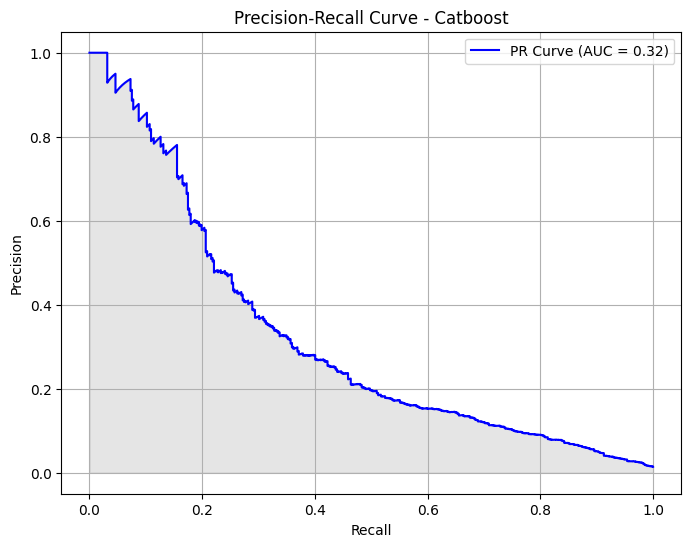

In [ ]:
from catboost import CatBoostClassifier

# Initialize and train
catboost_model = CatBoostClassifier(verbose=0)
catboost_model.fit(X_train_resampled, y_train_resampled)

# Predictions and probabilities
y_pred = catboost_model.predict(X_test)
y_prob = catboost_model.predict_proba(X_test)[:, 1]

# (Repeat the metrics and visualizations as above)
# Confusion Matrix
print("Confusion Matrix (Catboost):\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report (Catboost):\n", classification_report(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print("\nROC-AUC Score (Catboost):", roc_auc)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.fill_between(fpr, tpr, alpha=0.2, color='gray')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Catboost')
plt.legend(loc='best')
plt.grid()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.2f})', color='blue')
plt.fill_between(recall, precision, alpha=0.2, color='gray')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Catboost')
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
# Assuming `catboost_model` is your trained CatBoost model
params = catboost_model.get_all_params()

# Print the parameters
print("CatBoost Model Parameters:")
for param, value in params.items():
    print(f"{param}: {value}")


CatBoost Model Parameters:
nan_mode: Min
eval_metric: Logloss
iterations: 1000
sampling_frequency: PerTree
leaf_estimation_method: Newton
random_score_type: NormalWithModelSizeDecrease
grow_policy: SymmetricTree
penalties_coefficient: 1
boosting_type: Plain
model_shrink_mode: Constant
feature_border_type: GreedyLogSum
bayesian_matrix_reg: 0.10000000149011612
eval_fraction: 0
force_unit_auto_pair_weights: False
l2_leaf_reg: 3
random_strength: 1
rsm: 1
boost_from_average: False
model_size_reg: 0.5
pool_metainfo_options: {'tags': {}}
subsample: 0.800000011920929
use_best_model: False
class_names: [0, 1]
random_seed: 0
depth: 6
posterior_sampling: False
border_count: 254
classes_count: 0
auto_class_weights: None
sparse_features_conflict_fraction: 0
leaf_estimation_backtracking: AnyImprovement
best_model_min_trees: 1
model_shrink_rate: 0
min_data_in_leaf: 1
loss_function: Logloss
learning_rate: 0.08338899910449982
score_function: Cosine
task_type: CPU
leaf_estimation_iterations: 10
bootstra

## Gradient Boost Machine

Confusion Matrix (GBM):
 [[25316  3314]
 [  104   308]]

Classification Report (GBM):
               precision    recall  f1-score   support

         0.0       1.00      0.88      0.94     28630
         1.0       0.09      0.75      0.15       412

    accuracy                           0.88     29042
   macro avg       0.54      0.82      0.54     29042
weighted avg       0.98      0.88      0.93     29042


ROC-AUC Score (GBM): 0.9071858394175436


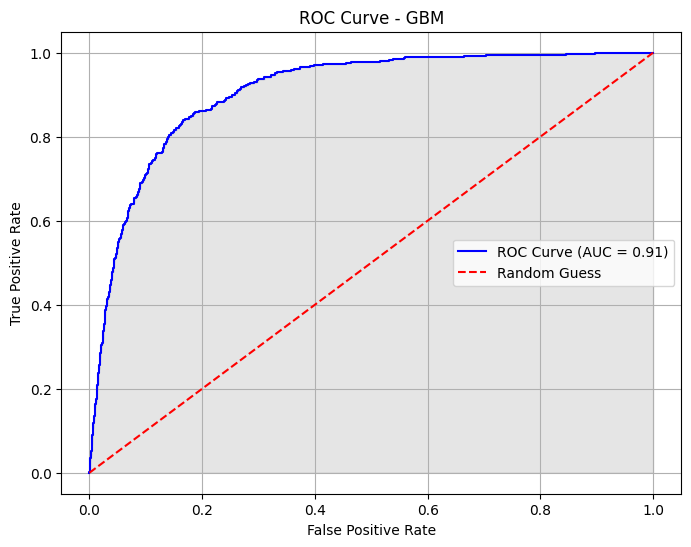

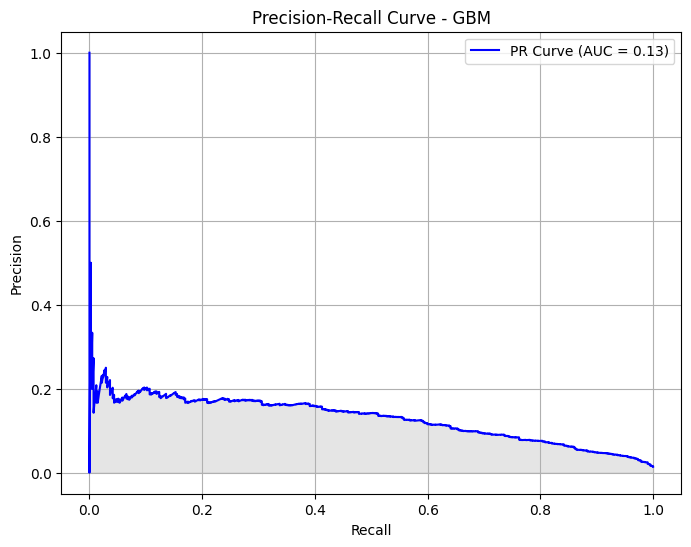

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train_resampled, y_train_resampled)

# Predictions and probabilities
y_pred = gbm_model.predict(X_test)
y_prob = gbm_model.predict_proba(X_test)[:, 1]

# (Repeat the metrics and visualizations as above)

# Confusion Matrix
print("Confusion Matrix (GBM):\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report (GBM):\n", classification_report(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print("\nROC-AUC Score (GBM):", roc_auc)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.fill_between(fpr, tpr, alpha=0.2, color='gray')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - GBM')
plt.legend(loc='best')
plt.grid()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.2f})', color='blue')
plt.fill_between(recall, precision, alpha=0.2, color='gray')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - GBM')
plt.legend(loc='best')
plt.grid()
plt.show()